# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

1. **Sumber Dataset**:  
   Dataset REXUS Inventory (Building) berasal dari sumber publik (PBS via Kaggle).
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tanpa label/target
   - **Jumlah Baris**: Dataset memiliki 8.770 baris.
   - **Tipe Data**: Dataset mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Bldg State, Owned/Leased.
     - *Numerikal*: Total Parking Spaces, Bldg ANSI Usable.

3. **Pembatasan**:  
   Dataset belum pernah dipakai untuk customer segmentation clustering.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [889]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**Insight**:
- `pandas`: manipulasi data tabular.  
- `numpy`: operasi numerik.  
- `matplotlib.pyplot`: visualisasi data.  
- `seaborn`: grafik statistik.  
- `StandardScaler`: standarisasi fitur.  
- `LabelEncoder`: encode label kategori.  
- `KMeans`: klasterisasi data.  
- `silhouette_score`: evaluasi klaster.  
- `PCA`: reduksi dimensi.

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [893]:
df = pd.read_csv('Dataset_clustering.csv') 
display(display(df))

,Location Code,Region Code,Bldg Address1,Bldg City,Bldg County,Bldg State,Bldg Zip,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Construction Date,Historical Type,Historical Status,ABA Accessibility Flag
0,CT0013,1,135 HIGH ST,HARTFORD,HARTFORD,CT,61031125,ACTIVE,BUILDING,93394,28,OWNED,1-Jan-33,Field Not In Use,National Register Listed,Will Conform
1,CT0024,1,141 CHURCH ST,NEW HAVEN,NEW HAVEN,CT,65102001,ACTIVE,BUILDING,67174,0,OWNED,1-Jan-19,Field Not In Use,National Register Listed,Will Conform
2,CT0047,1,135 GRAND ST,WATERBURY,NEW HAVEN,CT,67029998,ACTIVE,BUILDING,269,0,LEASED,1-Jan-33,Field Not In Use,National Register Listed,Will Conform
3,CT0053,1,450 MAIN ST,HARTFORD,HARTFORD,CT,61031804,ACTIVE,BUILDING,197999,105,OWNED,1-Jan-63,Field Not In Use,,Will Conform
4,CT0059,1,915 LAFAYETTE BLVD,BRIDGEPORT,FAIRFIELD,CT,66044706,ACTIVE,BUILDING,85551,131,OWNED,1-Jan-67,Field Not In Use,,Will Conform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,NV8371,9,6750 VIA AUSTI PKY,LAS VEGAS,CLARK,NV,891193565,ACTIVE,BUILDING,23669,24,LEASED,1-Jan-00,Field Not In Use,Not Evaluated,Will Conform
8766,NV8403,9,3595 E PATRICK LN,LAS VEGAS,CLARK,NV,891203214,ACTIVE,BUILDING,10894,7,LEASED,1-Jan-00,Field Not In Use,Not Evaluated,Yes
8767,NV8446,9,5665 MORGAN MILL RD,CARSON CITY,IND.CITY-CARSON,NV,897011448,ACTIVE,BUILDING,35839,221,LEASED,1-Jan-00,Field Not In Use,,Yes
8768,NV8447,9,5100 E WINNEMUCCA BLVD,WINNEMUCCA,HUMBOLDT,NV,894452921,ACTIVE,BUILDING,34050,288,LEASED,1-Jan-00,Field Not In Use,Not Evaluated,Yes


None

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**

In [897]:
print("Jumlah Baris dan Kolom:", df.shape)
print("\nTipe Data:")
print(df.dtypes)
print("\nCek Missing Values:")
print(df.isnull().sum())
print ("\nCek Duplikasi:", df.duplicated().sum())

Jumlah Baris dan Kolom: (8770, 16)

Tipe Data:
Location Code              object
Region Code                 int64
Bldg Address1              object
Bldg City                  object
Bldg County                object
Bldg State                 object
Bldg Zip                    int64
Bldg Status                object
Property Type              object
Bldg ANSI Usable            int64
Total Parking Spaces        int64
Owned/Leased               object
Construction Date          object
Historical Type            object
Historical Status          object
ABA Accessibility Flag     object
dtype: object

Cek Missing Values:
Location Code              0
Region Code                0
Bldg Address1              0
Bldg City                  0
Bldg County                0
Bldg State                 0
Bldg Zip                   0
Bldg Status                0
Property Type              0
Bldg ANSI Usable           0
Total Parking Spaces       0
Owned/Leased               0
Construction Date         

**Insight**:
- Dataset memiliki 8770 baris dan 16 kolom
- Tidak memiliki missing value
- Tdiak ada duplikasi
- Ada ketidaksesuaian tipe data pada kolom construction date dan akan ditangani pada saat data preprocessing

2. **Menangani Data yang Hilang**  

Tidak ada missing value dalam dataset

3. **Analisis Distribusi dan Korelasi**  

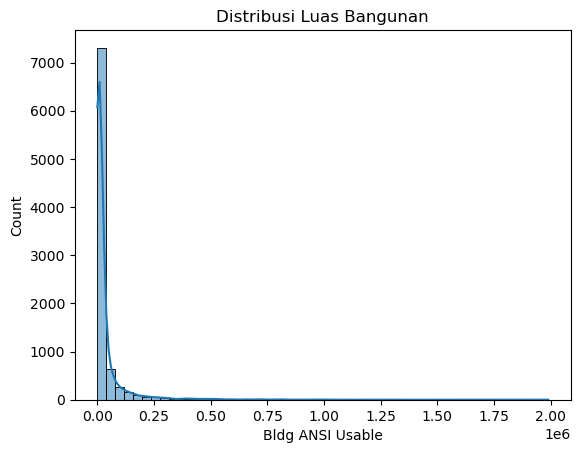

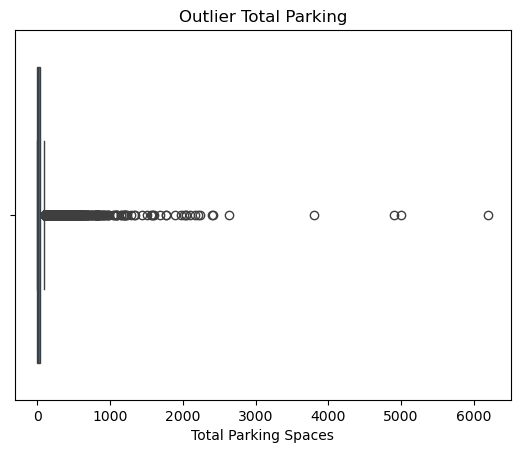

In [903]:
# Visualisasi numerik
sns.histplot(df['Bldg ANSI Usable'], bins=50, kde=True)
plt.title("Distribusi Luas Bangunan")
plt.show()

sns.boxplot(x=df['Total Parking Spaces'])
plt.title("Outlier Total Parking")
plt.show()

**insight**:
- Distribusi `Bldg ANSI Usable` sangat condong ke kiri, menunjukkan banyak bangunan dengan luas kecil.  
- Terdapat outlier signifikan pada variabel `Total Parking Spaces`, dengan beberapa properti memiliki lebih dari 6000 tempat parkir.  
- Mayoritas bangunan memiliki jumlah tempat parkir yang relatif rendah.  
- Skewness pada kedua variabel mengindikasikan potensi perlunya transformasi data sebelum analisis lebih lanjut.

4. **Visualisasi Data**  

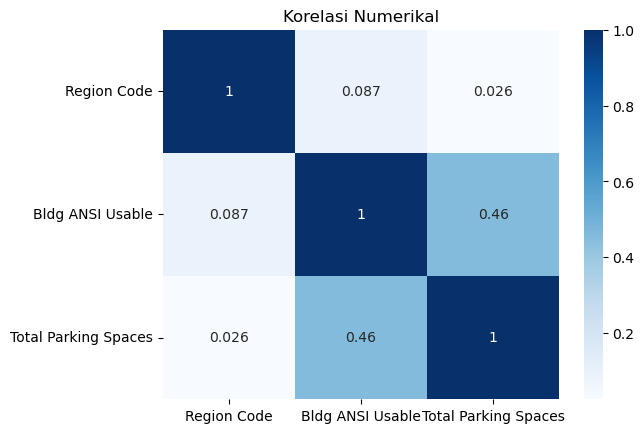

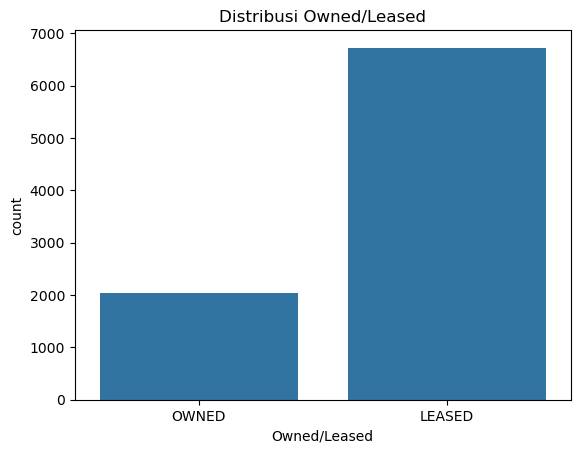

In [907]:
# Heatmap Korelasi
num_cols = ['Region Code', 'Bldg ANSI Usable', 'Total Parking Spaces']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.title("Korelasi Numerikal")
plt.show()

# Kategorikal
sns.countplot(x='Owned/Leased', data=df)
plt.title("Distribusi Owned/Leased")
plt.show()

**insight**:
- Terdapat korelasi sedang antara `Bldg ANSI Usable` dan `Total Parking Spaces` (0.46), menunjukkan bangunan lebih besar cenderung punya lebih banyak tempat parkir.  
- Korelasi antara `Region Code` dengan variabel lain sangat rendah, menandakan pengaruh wilayah tidak signifikan terhadap luas bangunan atau parkiran.  
- Bangunan yang disewa (LEASED) jauh lebih banyak dibandingkan yang dimiliki (OWNED).  
- Distribusi kepemilikan dapat menjadi faktor penting dalam analisis lebih lanjut terkait efisiensi atau biaya operasional.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [912]:
selected_cols = ['Region Code', 'Bldg ANSI Usable', 'Total Parking Spaces',
                 'Owned/Leased', 'Property Type', 'Bldg Status']
df_proc = df[selected_cols].copy()

**insight**:
- Menyeleksi kolom-kolom penting yang akan difokuskan untuk analisis lebih lanjut.  
- Kolom terpilih mencakup kombinasi fitur numerik dan kategorikal yang relevan untuk memahami karakteristik dan status properti.  
- Data disalin ke `df_proc` agar analisis dapat dilakukan tanpa mengubah data asli.

In [915]:
# Hapus kolom yang tidak relevan
columns_to_drop = [
    'Location Code',
    'Bldg Address1',
    'Bldg City',
    'Bldg County',
    'Bldg Zip',
]
df.drop(columns=columns_to_drop, inplace=True)

**Insight**:
Menghapus beberapa kolom yang dirasa kurang relevan

In [918]:
# Konversi Construction Date menjadi datetime
df['Construction Date'] = pd.to_datetime(df['Construction Date'], errors='coerce')

# Buat kolom Building Age
df['Building Age'] = 2025 - df['Construction Date'].dt.year

C:\Users\azhar\AppData\Local\Temp\ipykernel_14312\1499572457.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Construction Date'] = pd.to_datetime(df['Construction Date'], errors='coerce')


**Insight**:
- Tanggal konstruksi diubah ke format datetime untuk menghitung usia banguna 
- Melakukan konversi Construction Date menjadi Building Age

In [921]:
# Cek sebaran data kategorikal
print("Sebaran Owned/Leased:")
print(df['Owned/Leased'].value_counts())
print("\nSebaran Property Type:")
print(df['Property Type'].value_counts())
print("\nSebaran Bldg Status:")
print(df['Bldg Status'].value_counts())

Sebaran Owned/Leased:
Owned/Leased
LEASED    6723
OWNED     2047
Name: count, dtype: int64

Sebaran Property Type:
Property Type
BUILDING     8412
STRUCTURE     358
Name: count, dtype: int64

Sebaran Bldg Status:
Bldg Status
ACTIVE            8718
EXCESS              39
DECOMMISSIONED      13
Name: count, dtype: int64


**Insight**:
- Sebagian besar properti adalah bangunan (BUILDING), bukan struktur lainnya.
- Status bangunan didominasi oleh yang masih aktif (ACTIVE).
- Jumlah properti yang disewa (LEASED) lebih dari tiga kali lipat dibandingkan yang dimiliki (OWNED).

In [924]:
# Encode kategorikal
le_dict = {}
for col in ['Owned/Leased', 'Property Type', 'Bldg Status']:
    le = LabelEncoder()
    df_proc[col] = le.fit_transform(df_proc[col])
    le_dict[col] = le

**Insight**:
- Mengubah variabel kategorikal menjadi format numerik agar dapat digunakan dalam analisis atau pemodelan machine learning.  
- Label encoding diterapkan pada kolom `Owned/Leased`, `Property Type`, dan `Bldg Status`.  
- Dictionary `le_dict` menyimpan objek encoder untuk tiap kolom, berguna jika ingin mengubah kembali ke label asli nanti.

In [927]:
# Standarisasi fitur numerik
num_cols = ['Region Code', 'Bldg ANSI Usable', 'Total Parking Spaces']
scaler = StandardScaler()
df_proc[num_cols] = scaler.fit_transform(df_proc[num_cols])

**Insight**: Standardisasi dilakukan untuk menyetarakan skala fitur numerik agar memiliki mean 0 dan standar deviasi 1.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [933]:
inertia = []
sil_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_proc)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_proc, kmeans.labels_))

**Insight**:
- Menjalankan K-Means clustering untuk jumlah klaster dari 2 hingga 10.  
- `inertia` digunakan untuk mengevaluasi seberapa baik data dikelompokkan (semakin kecil, semakin baik).  
- `sil_scores` mengukur kualitas klaster dengan nilai silhouette (semakin mendekati 1, semakin baik pemisahan antar klaster).  
- Hasil ini dapat digunakan untuk menentukan jumlah klaster optimal dengan metode elbow dan silhouette analysis.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

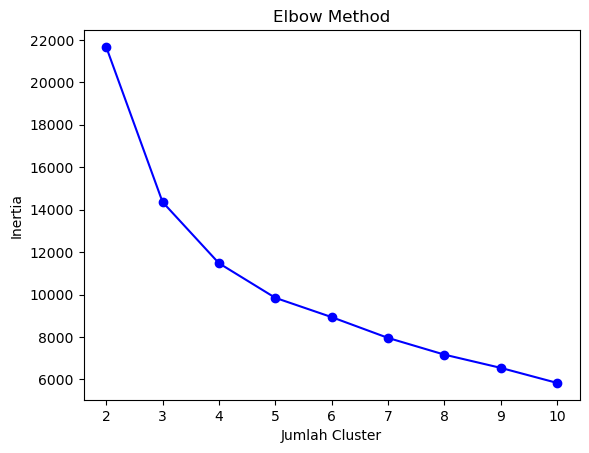

In [937]:
# Visualisasi Elbow Method
plt.plot(range_k, inertia, 'bo-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

**Insight**:
- Berdasarkan **Elbow Method**, titik siku terlihat pada jumlah cluster **4**, menunjukkan potensi jumlah cluster optimal.

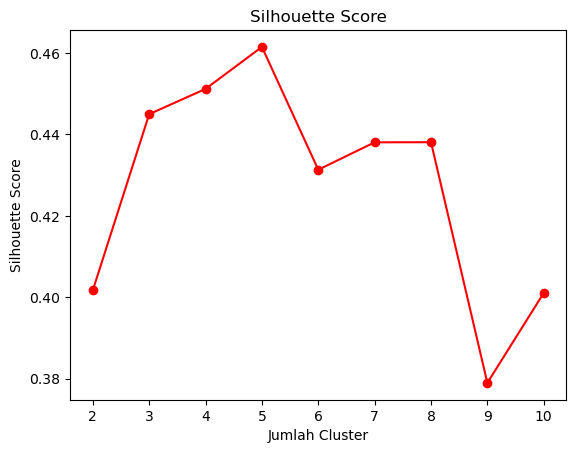

In [939]:
# Visualisasi Silhouette Score
plt.plot(range_k, sil_scores, 'ro-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

**Insight**:
- **Silhouette Score** tertinggi juga muncul saat jumlah cluster **4**, mengindikasikan pemisahan antar cluster paling baik pada titik ini.  
- Kedua metode merekomendasikan jumlah cluster optimal sebanyak **4** untuk segmentasi data yang efisien dan representatif.

In [941]:
# Bangun model dengan jumlah cluster optimal
inertia = []
sil_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(df_proc)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_proc, kmeans.labels_))
    df_proc['Cluster'] = kmeans_final.fit_predict(df_proc)

**Insight**:
- Model K-Means dibangun dengan jumlah cluster optimal sebanyak **4** berdasarkan evaluasi sebelumnya.  
- Setiap data kini diberi label klaster pada kolom baru `Cluster`, yang siap digunakan untuk analisis lebih lanjut atau visualisasi segmen.  
- Proses ini memungkinkan pengelompokan properti berdasarkan kesamaan karakteristik numerik dan kategorikal yang telah diproses.

In [956]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score
score = silhouette_score(df_proc.drop(columns='Cluster'), df_proc['Cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.4512


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [960]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

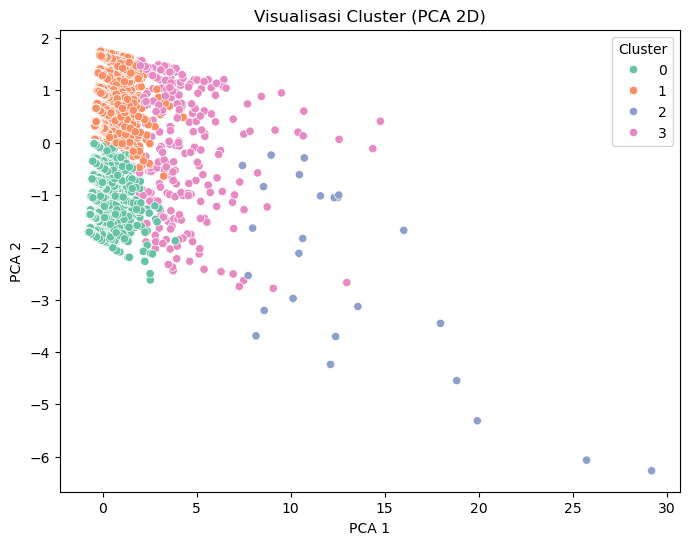

In [964]:
# PCA untuk reduksi dimensi dan visualisasi 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_proc.drop(columns='Cluster'))

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=df_proc['Cluster'], palette='Set2')
plt.title("Visualisasi Cluster (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()


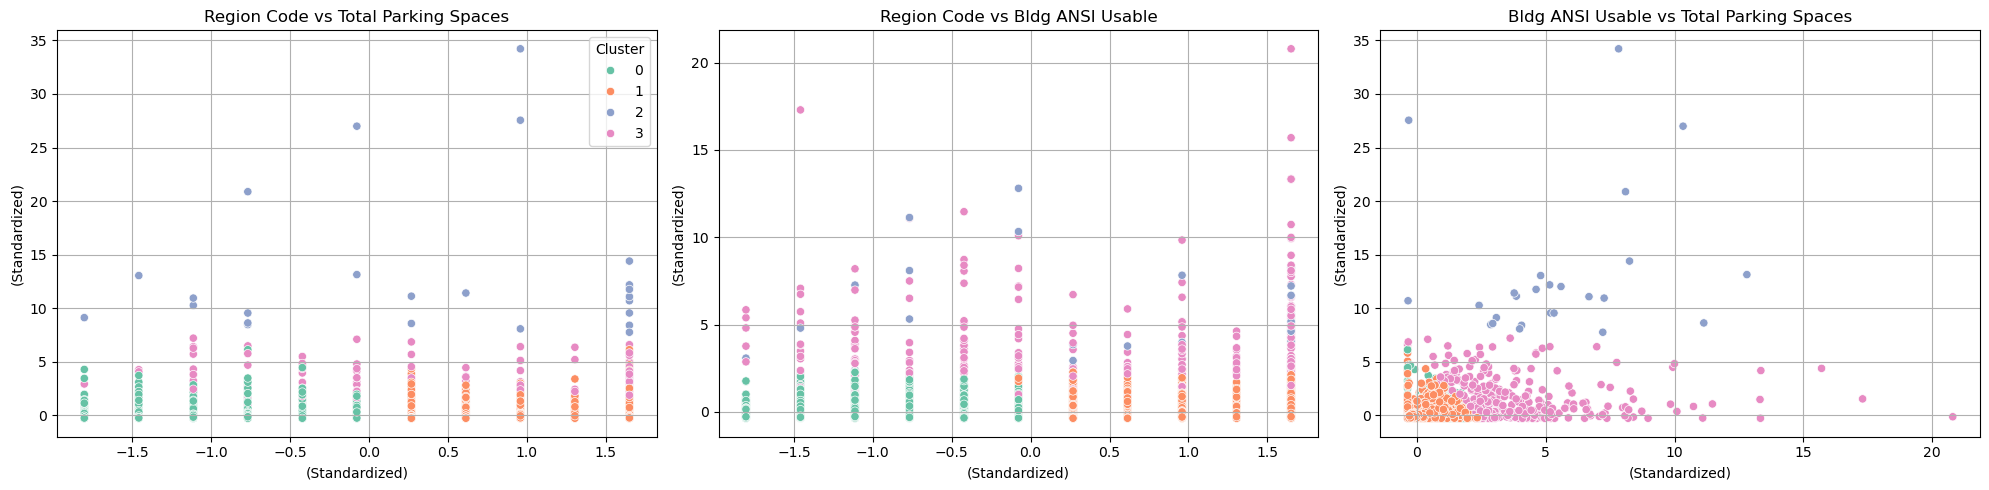

In [966]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Region Code vs Total Parking Spaces
sns.scatterplot(
    ax=axes[0],
    x=df_proc['Region Code'],
    y=df_proc['Total Parking Spaces'],
    hue=df_proc['Cluster'],
    palette='Set2'
)
axes[0].set_title("Region Code vs Total Parking Spaces")

# Region Code vs Bldg ANSI Usable
sns.scatterplot(
    ax=axes[1],
    x=df_proc['Region Code'],
    y=df_proc['Bldg ANSI Usable'],
    hue=df_proc['Cluster'],
    palette='Set2',
    legend=False
)
axes[1].set_title("Region Code vs Bldg ANSI Usable")

# Bldg ANSI Usable vs Total Parking Spaces
sns.scatterplot(
    ax=axes[2],
    x=df_proc['Bldg ANSI Usable'],
    y=df_proc['Total Parking Spaces'],
    hue=df_proc['Cluster'],
    palette='Set2',
    legend=False
)
axes[2].set_title("Bldg ANSI Usable vs Total Parking Spaces")

# Layout
for ax in axes:
    ax.grid(True)
    ax.set_xlabel("(Standardized)")
    ax.set_ylabel("(Standardized)")

plt.tight_layout()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [971]:
# Tambahkan cluster ke df_proc
df_proc['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [975]:
# Inverse transform fitur numerik
df_proc[num_cols] = scaler.inverse_transform(df_proc[num_cols])

# Inverse transform fitur kategorikal
for col, le in le_dict.items():
    df_proc[col] = le.inverse_transform(df_proc[col])

In [977]:
df_result = df.copy()
df_result[df_proc.columns] = df_proc

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [980]:
# Ringkasan statistik tiap cluster
cluster_summary = filtered_df.groupby('Cluster')[
    ['Region Code', 'Bldg ANSI Usable', 'Total Parking Spaces']
].mean()

# Distribusi kategorikal
cluster_cats = filtered_df.groupby('Cluster')[
    ['Owned/Leased', 'Property Type', 'Bldg Status']
].agg(lambda x: x.value_counts().index[0])  # modus kategori

# Gabungkan ringkasan
summary = pd.concat([cluster_summary, cluster_cats], axis=1)
print(summary)

         Region Code  Bldg ANSI Usable  Total Parking Spaces Owned/Leased  \
Cluster                                                                     
0           3.679924      19599.372396             35.441051       LEASED   
1           8.661484      21100.164429             33.043816       LEASED   
2           7.400000     547668.520000           2420.080000        OWNED   
3           7.496377     408169.865942            344.355072        OWNED   

        Property Type Bldg Status  
Cluster                            
0            BUILDING      ACTIVE  
1            BUILDING      ACTIVE  
2            BUILDING      ACTIVE  
3            BUILDING      ACTIVE  


## **Analisis dan Interpretasi Tiap Cluster**

### **Cluster 0**
- **Rata-rata Region Code:** 3.68  
- **Rata-rata Bldg ANSI Usable:** 19,599 sqft  
- **Rata-rata Total Parking Spaces:** 35  
- **Status Kepemilikan:** Mayoritas LEASED  
- **Analisis:** Cluster ini terdiri dari bangunan aktif berukuran kecil-menengah yang mayoritas disewa (leased) dan berada di wilayah Region Code yang lebih rendah (mungkin pusat kota atau area administratif lama). Jumlah lahan parkirnya cukup terbatas. Bisa jadi ini adalah properti dengan fungsi operasional ringan.

### **Cluster 1**
- **Rata-rata Region Code:** 8.66  
- **Rata-rata Bldg ANSI Usable:** 21,100 sqft  
- **Rata-rata Total Parking Spaces:** 33  
- **Status Kepemilikan:** Mayoritas Leased  
- **Analisis:** Cluster ini sangat mirip dengan Cluster 0, namun dengan Region Code lebih tinggi, yang kemungkinan menandakan lokasi di wilayah luar atau pinggiran kota. Ukuran bangunan sedikit lebih besar, namun jumlah tempat parkir sedikit lebih kecil. Masih didominasi oleh properti disewa, berfungsi secara aktif.

### **Cluster 2**
- **Rata-rata Region Code:** 7.40  
- **Rata-rata Bldg ANSI Usable:** 547,668 sqft  
- **Rata-rata Total Parking Spaces:** 2,420  
- **Status Kepemilikan:** Mayoritas Owned  
- **Analisis:** Cluster ini mewakili bangunan besar atau fasilitas utama yang dimiliki langsung oleh pemerintah (owned). Luas bangunan dan kapasitas parkir sangat tinggi, menunjukkan properti berskala besar seperti markas, pusat logistik, atau pusat layanan publik. Lokasinya berada di Region Code menengah-tinggi.

### **Cluster 3**
- **Rata-rata Region Code:** 7.50  
- **Rata-rata Bldg ANSI Usable:** 408,170 sqft  
- **Rata-rata Total Parking Spaces:** 344  
- **Status Kepemilikan:** Mayoritas Owned  
- **Analisis:** Cluster ini juga berisi properti besar yang dimiliki (owned), namun ukuran dan kapasitasnya berada di antara Cluster 1 dan 2. Jumlah parkir jauh lebih rendah dibanding Cluster 2, bisa jadi bangunan dengan fungsi khusus atau terbatas seperti arsip, penyimpanan, atau fasilitas teknis.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [985]:
df_result.to_csv('Dataset_inisiasi.csv', index=False)